<a href="https://colab.research.google.com/github/shengwenLeong/Colab/blob/main/SNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [13]:
import seaborn as sns
sns.set()
G = nx.Graph()

In [14]:
data = np.random.rand(5,2)
dataSet = {}
for i in range(data.shape[0]):
  dataSet[i] = data[i]
  G.add_node(i, pos=(data[i][0], data[i][1]))
  print(data[i])

[0.33418025 0.29006607]
[0.08611338 0.66947783]
[0.31676089 0.76512282]
[0.26002158 0.13212662]
[0.8411978  0.60939953]


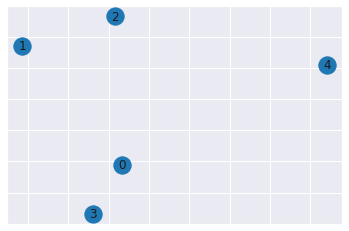

In [15]:
node_pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, node_pos)
# Show the plot
plt.show()

In [5]:
vals = np.array([list(v) for v in dataSet.values()])
print(vals)

[[0.04383869 0.07711758]
 [0.57722987 0.10712107]
 [0.08970778 0.54294219]
 [0.11646021 0.43325357]
 [0.88251018 0.22350466]]


...{1: array([0.08611338, 0.66947783]), 2: array([0.31676089, 0.76512282]), 3: array([0.26002158, 0.13212662]), 4: array([0.8411978 , 0.60939953])}
...{1: array([0.08611338, 0.66947783]), 2: array([0.31676089, 0.76512282]), 4: array([0.8411978 , 0.60939953])}
after prun{1: array([0.08611338, 0.66947783]), 2: array([0.31676089, 0.76512282]), 4: array([0.8411978 , 0.60939953])}


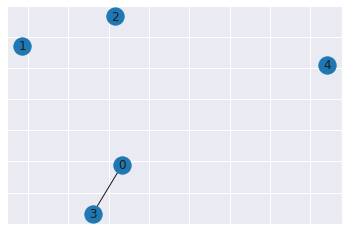

...{2: array([0.31676089, 0.76512282]), 4: array([0.8411978 , 0.60939953])}
remove node=2
after prun{4: array([0.8411978 , 0.60939953])}


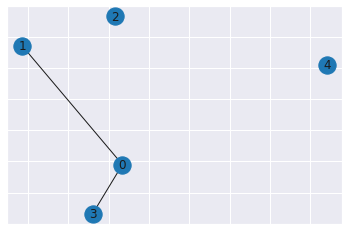

...{}
after prun{}


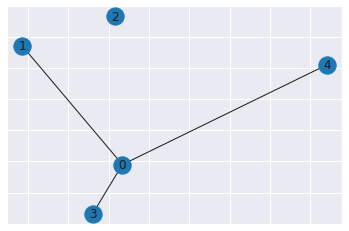

...{0: array([0.33418025, 0.29006607]), 2: array([0.31676089, 0.76512282]), 3: array([0.26002158, 0.13212662]), 4: array([0.8411978 , 0.60939953])}
...{0: array([0.33418025, 0.29006607]), 3: array([0.26002158, 0.13212662]), 4: array([0.8411978 , 0.60939953])}
remove node=4
after prun{0: array([0.33418025, 0.29006607]), 3: array([0.26002158, 0.13212662])}


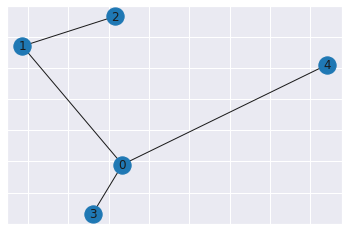

...{3: array([0.26002158, 0.13212662])}
remove node=3
after prun{}


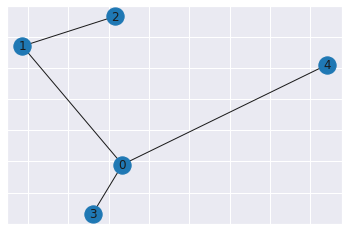

...{0: array([0.33418025, 0.29006607]), 1: array([0.08611338, 0.66947783]), 3: array([0.26002158, 0.13212662]), 4: array([0.8411978 , 0.60939953])}
...{0: array([0.33418025, 0.29006607]), 3: array([0.26002158, 0.13212662]), 4: array([0.8411978 , 0.60939953])}
remove node=0
remove node=3
after prun{4: array([0.8411978 , 0.60939953])}


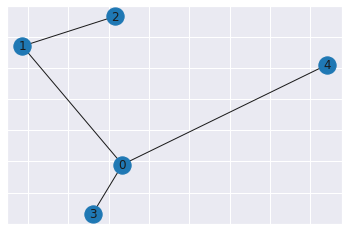

...{}
after prun{}


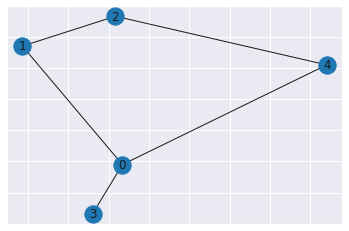

...{0: array([0.33418025, 0.29006607]), 1: array([0.08611338, 0.66947783]), 2: array([0.31676089, 0.76512282]), 4: array([0.8411978 , 0.60939953])}
...{1: array([0.08611338, 0.66947783]), 2: array([0.31676089, 0.76512282]), 4: array([0.8411978 , 0.60939953])}
remove node=1
remove node=2
remove node=4
after prun{}


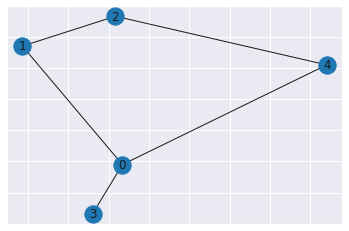

...{0: array([0.33418025, 0.29006607]), 1: array([0.08611338, 0.66947783]), 2: array([0.31676089, 0.76512282]), 3: array([0.26002158, 0.13212662])}
...{0: array([0.33418025, 0.29006607]), 1: array([0.08611338, 0.66947783]), 3: array([0.26002158, 0.13212662])}
remove node=0
remove node=1
remove node=3
after prun{}


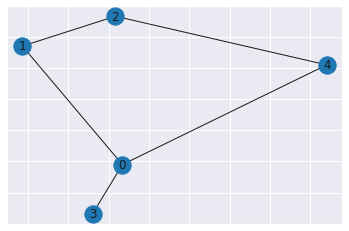

In [16]:
for i in dataSet:
  querySet = dataSet[i]
  initSet = dict(dataSet)
  initSet.pop(i)
  #print(querySet)
  print("...{}".format(initSet))
  while len(initSet) != 0:
    distance = {key: np.linalg.norm(val - querySet) for key, val in initSet.items()}
    #print(distance)
    distance = dict(sorted(distance.items(), key = lambda kv:(kv[1])))
    #print(distance)
    nearSrc = next(iter(distance))
    nearVal = initSet[nearSrc]
    #print(nearSrc)
    #print(nearVal)
    G.add_edge(i, nearSrc)
    initSet.pop(nearSrc)
    print("...{}".format(initSet))
    pruneSet = initSet.copy()
    for key, value in initSet.items():
      if np.linalg.norm(querySet-value) > np.linalg.norm(nearVal - value):
        pruneSet.pop(key)
        print("remove node={}".format(key))
    initSet = pruneSet.copy()
    print("after prun{}".format(pruneSet))
    node_pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx(G, node_pos)
    # Show the plot
    plt.show()